In [1]:
import pandas as pd  
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
import pylab 
import statsmodels.api as sm


In [2]:
sns.set()

filename = r'C:\Users\mbhattac\Downloads\tab_files\avocado.csv'

data = pd.read_csv(filename)

data.Date = data.Date.map(lambda x : datetime.strptime(x, '%Y-%m-%d') )


conventional
organic


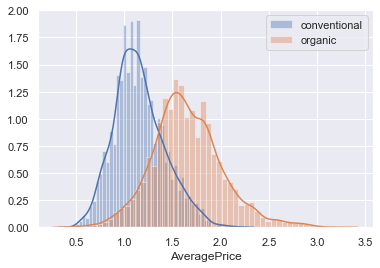

In [3]:
for datatype in data.type.unique():
    print(datatype)
    sns.distplot(data.loc[data.type == datatype].AveragePrice, label=datatype)

plt.legend()


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


California
Charlotte
Chicago
CincinnatiDayton
Columbus


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


DallasFtWorth
Denver
Detroit
GrandRapids


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


GreatLakes
HarrisburgScranton
HartfordSpringfield
Houston
Indianapolis


No handles with labels found to put in legend.
No handles with labels found to put in legend.


Jacksonville
LasVegas
LosAngeles


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Louisville
MiamiFtLauderdale
Midsouth
Nashville


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


NewOrleansMobile
NewYork
Northeast
NorthernNewEngland
Orlando


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Philadelphia
PhoenixTucson
Pittsburgh
Plains
Portland


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RaleighGreensboro
RichmondNorfolk
Roanoke
Sacramento
SanDiego


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


SanFrancisco
Seattle
SouthCarolina
SouthCentral
Southeast
Spokane


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


StLouis
Syracuse
Tampa
TotalUS
West


No handles with labels found to put in legend.


WestTexNewMexico


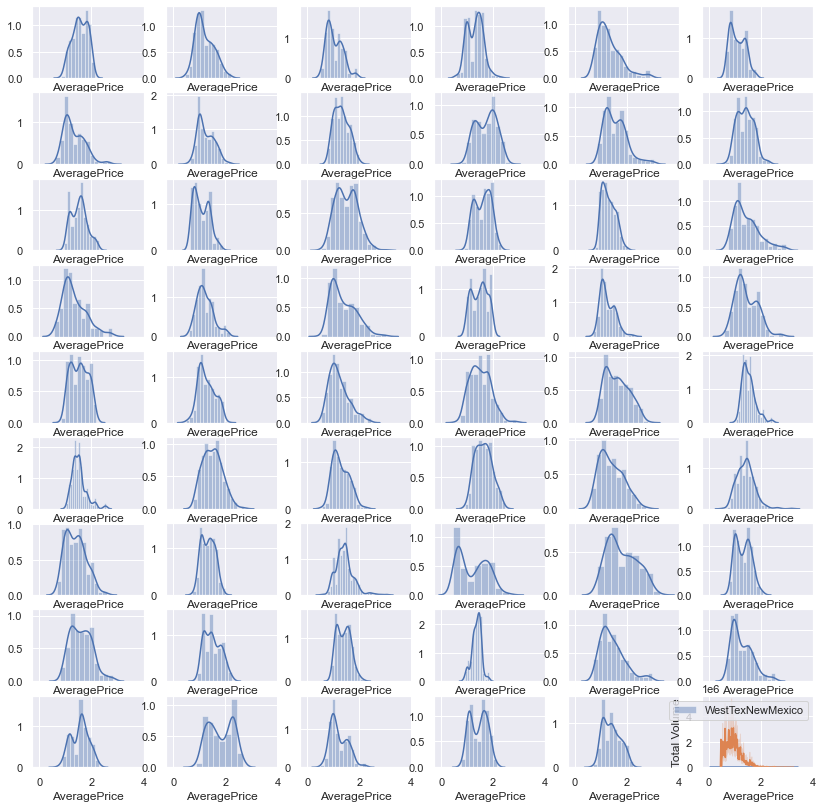

In [4]:
height = int(data.region.unique().shape[0]/6)
width = 6 
f, axes = plt.subplots(height, width, figsize=(14, 14), sharex=True)

counterh=0
counterw=0
for datatype in data.region.unique():
    print(datatype)
    sns.distplot(data.loc[data.region == datatype].AveragePrice, label=datatype,ax=axes[counterh,counterw])
    plt.legend()
    counterh+=1
    if  counterh % height == 0:
        counterh=0
        counterw+=1
        

#  how does sales volume vary with price 
sns.lineplot(x=data.AveragePrice, y=data['Total Volume'])


C:\Users\mbhattac\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


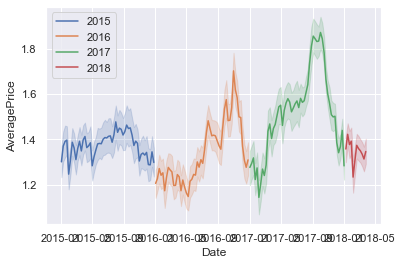

In [5]:
for yeartype in data.year.unique():    
    sns.lineplot(y=data.loc[data.year == yeartype].AveragePrice, x=data.loc[data.year == yeartype]['Date'],markers=True,label=yeartype)
plt.legend()


# plot volatiity for each month in each year 
data['extractedmonthyear']= data.Date.map(lambda x: str(x.year) + '-' + str(x.month))
data['month']= data.Date.map(lambda x: str(x.month))
temp = data.groupby(['extractedmonthyear']).AveragePrice.std()
foo = pd.DataFrame()
foo['Variations']= temp.values
foo['Month'] = temp.index 
temp=foo
temp  = temp.sort_values(by=['Month'])
temp['Year']= temp.Month.map(lambda x : x.split('-')[0])
temp['MonthofYear']= temp.Month.map(lambda x : x.split('-')[1])


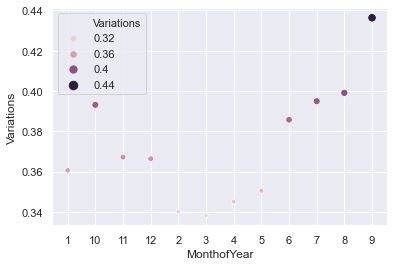

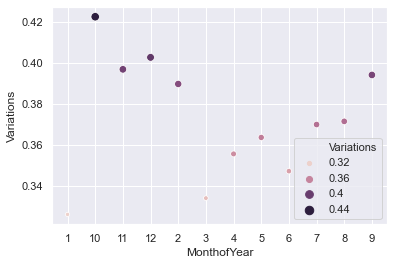

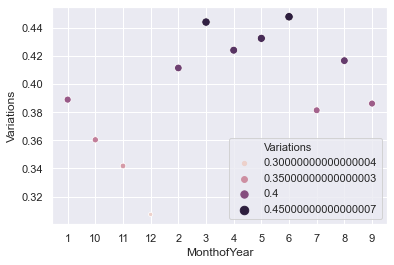

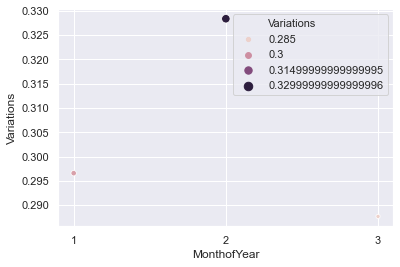

In [6]:
for year in temp.Year.unique():
    plt.figure()
    sns.scatterplot(x='MonthofYear',y='Variations', hue='Variations' , size='Variations' ,data=temp.loc[temp.Year ==  year ].sort_values(by=['MonthofYear']),)


data = data.set_index('Date')


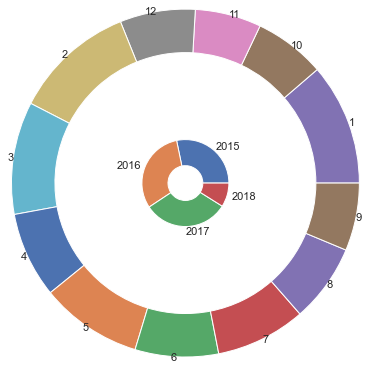

In [8]:
fig, ax = plt.subplots()
ax.axis('equal')

tempdataforpiechart=data.groupby(['year']).sum()
yearpie, _ = ax.pie(tempdataforpiechart['Total Volume'], radius=0.5, labels=tempdataforpiechart.index.values)
plt.setp( yearpie, width=0.3, edgecolor='white')
tempdataforpiechart=data.groupby(['month']).sum()
monthpie, _ = ax.pie(tempdataforpiechart['Total Volume'], radius=2, labeldistance=1, labels=tempdataforpiechart.index.values)
plt.setp( monthpie, width=0.5, edgecolor='white')
plt.margins(0,0)
plt.show()
